In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
application_record = pd.read_csv('application_record.csv')
credit_record = pd.read_csv('credit_record.csv')

In [3]:
application_record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [4]:
credit_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [5]:
# Replace X,C values with 0 as they are identified as Good clients
credit_record.replace(['X','C'], 0,inplace=True)

In [6]:
credit_record.STATUS = pd.to_numeric(credit_record.STATUS)

In [7]:
# Searching for customers who have at least one late month
drop_ls = []
for i in range(len(credit_record)):
    if credit_record.STATUS[i] != 0:
        drop_ls.append(credit_record.ID[i])

In [8]:
len(drop_ls)

14194

In [9]:
# Changing the STATUS of any client with at least one late month to 1
for i in range(len(credit_record)):
        if credit_record.ID[i] in drop_ls:
            credit_record.STATUS[i] = 1

In [10]:
credit_record.STATUS.value_counts()

0    904764
1    143811
Name: STATUS, dtype: int64

In [11]:
credit_record.drop_duplicates(inplace=True)
credit_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,0
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,0
...,...,...,...
1048570,5150487,-25,0
1048571,5150487,-26,0
1048572,5150487,-27,0
1048573,5150487,-28,0


Merging Datasets

In [12]:
print(f'No. of IDs in application_record = {len(application_record.ID)} No. of IDs in credit_record = {len(credit_record.ID)}')

No. of IDs in application_record = 438557 No. of IDs in credit_record = 1048575


In [13]:
dataset = application_record.merge(credit_record, on=['ID'], how='inner')
 # on to choose which column to merger on
 # How to get merge only the intersection between them

In [14]:
dataset.drop(['ID'],inplace=True,axis=1)

In [15]:
dataset.duplicated().sum()

412393

In [16]:
dataset.drop_duplicates(inplace=True)

In [17]:
dataset

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,1
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,1
2,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,1
3,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,1
4,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,1
777711,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10,1
777712,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11,1
777713,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,1


Getting Data's Information and Description

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365322 entries, 0 to 777714
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          365322 non-null  object 
 1   FLAG_OWN_CAR         365322 non-null  object 
 2   FLAG_OWN_REALTY      365322 non-null  object 
 3   CNT_CHILDREN         365322 non-null  int64  
 4   AMT_INCOME_TOTAL     365322 non-null  float64
 5   NAME_INCOME_TYPE     365322 non-null  object 
 6   NAME_EDUCATION_TYPE  365322 non-null  object 
 7   NAME_FAMILY_STATUS   365322 non-null  object 
 8   NAME_HOUSING_TYPE    365322 non-null  object 
 9   DAYS_BIRTH           365322 non-null  int64  
 10  DAYS_EMPLOYED        365322 non-null  int64  
 11  FLAG_MOBIL           365322 non-null  int64  
 12  FLAG_WORK_PHONE      365322 non-null  int64  
 13  FLAG_PHONE           365322 non-null  int64  
 14  FLAG_EMAIL           365322 non-null  int64  
 15  OCCUPATION_TYPE  

In [19]:
dataset.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
count,365322.000000,3.653220e+05,365322.000000,365322.000000,365322.0,365322.000000,365322.000000,365322.000000,365322.00000,365322.000000,365322.000000
mean,0.425742,1.848982e+05,-16161.482656,60776.306365,1.0,0.221878,0.294214,0.089595,2.19825,-21.695310,0.203226
std,0.768540,1.017316e+05,4144.182785,139028.719425,0.0,0.415510,0.455689,0.285601,0.92849,15.016078,0.402400
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.00000,-60.000000,0.000000
25%,0.000000,1.170000e+05,-19614.000000,-3208.000000,1.0,0.000000,0.000000,0.000000,2.00000,-33.000000,0.000000
50%,0.000000,1.575000e+05,-15849.000000,-1566.000000,1.0,0.000000,0.000000,0.000000,2.00000,-20.000000,0.000000
75%,1.000000,2.250000e+05,-12676.000000,-378.000000,1.0,0.000000,1.000000,0.000000,3.00000,-9.000000,0.000000
max,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.00000,0.000000,1.000000


In [20]:
dataset.isna().sum()

CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        113130
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

In [21]:
dataset.isna().sum().sum()

113130

Displaying Column "OCCUPATION_TYPE" with NULL Values

In [22]:
dataset.OCCUPATION_TYPE

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
777710    Laborers
777711    Laborers
777712    Laborers
777713    Laborers
777714    Laborers
Name: OCCUPATION_TYPE, Length: 365322, dtype: object

In [23]:
dataset.OCCUPATION_TYPE.value_counts()

Laborers                 62839
Core staff               34175
Sales staff              33786
Managers                 31066
Drivers                  23349
High skill tech staff    14459
Medicine staff           11937
Accountants              11926
Security staff            6851
Cooking staff             6663
Cleaning staff            5201
Private service staff     2989
Low-skill Laborers        2000
Secretaries               1523
Waiters/barmen staff      1272
HR staff                   973
IT staff                   617
Realty agents              566
Name: OCCUPATION_TYPE, dtype: int64

Replacing Null Values in 'OCCUPATION_TYPE' with Not Employed

In [24]:
dataset.OCCUPATION_TYPE.replace(np.nan, 'Other', inplace = True)

In [25]:
dataset.OCCUPATION_TYPE.value_counts()

Other                    113130
Laborers                  62839
Core staff                34175
Sales staff               33786
Managers                  31066
Drivers                   23349
High skill tech staff     14459
Medicine staff            11937
Accountants               11926
Security staff             6851
Cooking staff              6663
Cleaning staff             5201
Private service staff      2989
Low-skill Laborers         2000
Secretaries                1523
Waiters/barmen staff       1272
HR staff                    973
IT staff                    617
Realty agents               566
Name: OCCUPATION_TYPE, dtype: int64

Label Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        dataset[col] = le.fit_transform(dataset[col])

In [28]:
dataset.drop_duplicates(inplace=True)

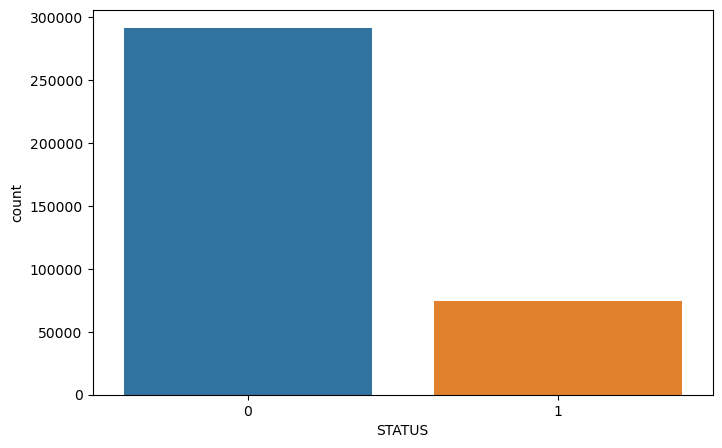

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.countplot(dataset['STATUS'])
plt.show()

somte analysis to balace the data


In [30]:
from imblearn.over_sampling import SMOTE

# Separate the target variable and the predictors
X = dataset.drop('STATUS', axis=1)
y = dataset['STATUS']

# Use SMOTE to oversample the minority class
oversampler = SMOTE(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Print the class distribution before and after SMOTE
print("Class distribution before SMOTE:", y.value_counts())
print("Class distribution after SMOTE:", y_resampled.value_counts())



Class distribution before SMOTE: 0    291079
1     74243
Name: STATUS, dtype: int64
Class distribution after SMOTE: 1    291079
0    291079
Name: STATUS, dtype: int64


<AxesSubplot:xlabel='STATUS', ylabel='count'>

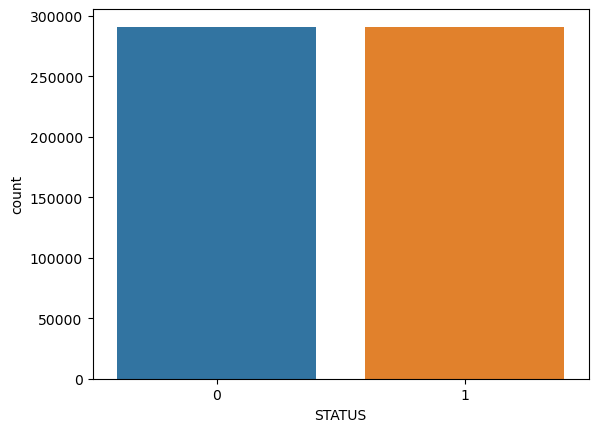

In [31]:
import seaborn as sns

# Plot the count of each class
sns.countplot(x=y_resampled)


In [32]:
dataset['STATUS'] = y_resampled

Text(0.5, 1.0, 'Distribution of Number of Children')

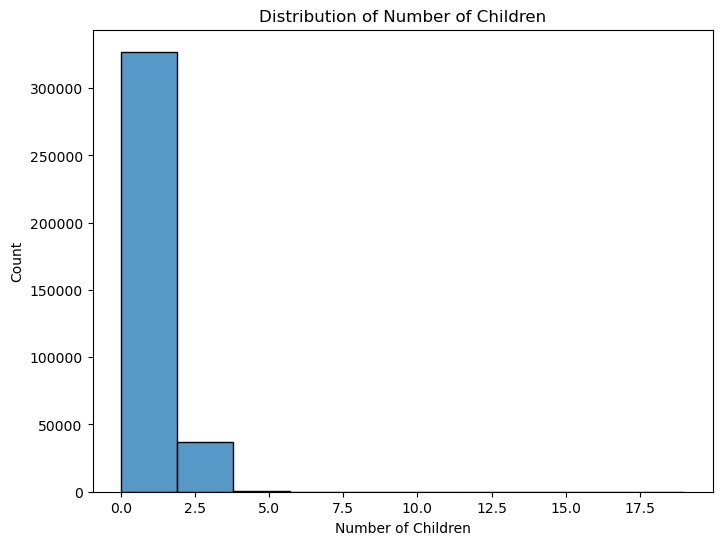

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns


# Visualize the distribution of CNT_CHILDREN variable
plt.figure(figsize=(8,6))
sns.histplot(dataset['CNT_CHILDREN'], bins=10, kde=False)
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title('Distribution of Number of Children')

Text(0.5, 1.0, 'Distribution of Income')

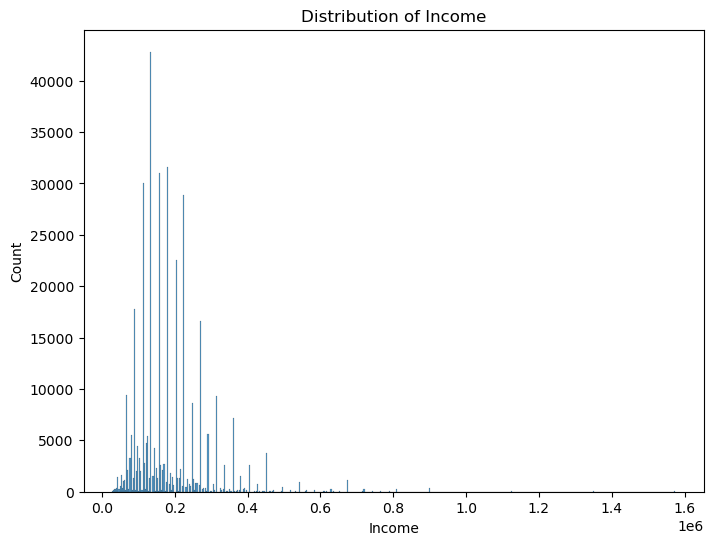

In [34]:
# Visualize the distribution of AMT_INCOME_TOTAL variable
plt.figure(figsize=(8,6))
sns.histplot(dataset['AMT_INCOME_TOTAL'], kde=False)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Distribution of Income')


Text(0.5, 1.0, 'Distribution of Income Type')

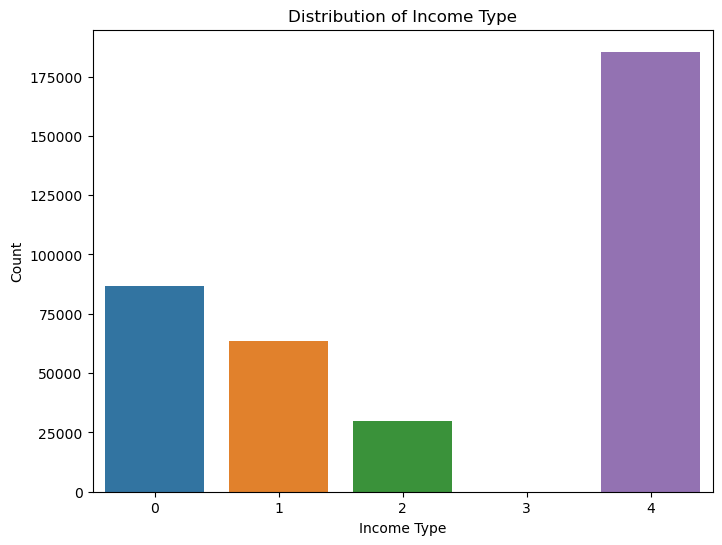

In [35]:
# Visualize the distribution of NAME_INCOME_TYPE variable
plt.figure(figsize=(8,6))
sns.countplot(dataset['NAME_INCOME_TYPE'])
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.title('Distribution of Income Type')

Text(0.5, 1.0, 'Distribution of Age')

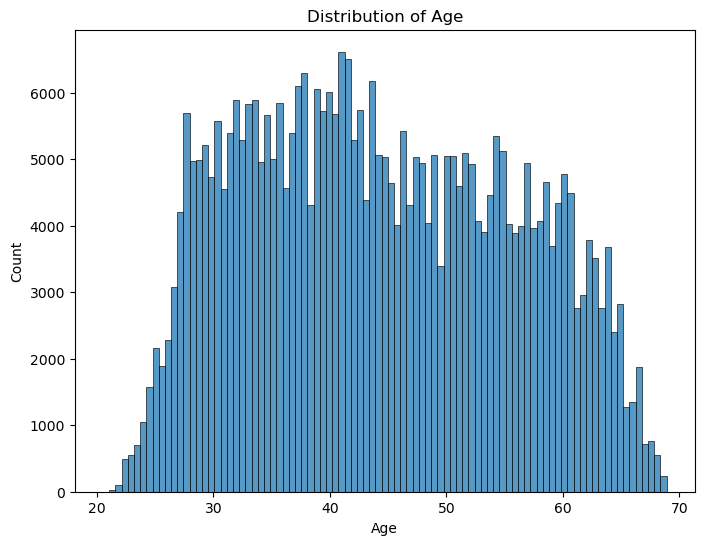

In [36]:
# Visualize the distribution of DAYS_BIRTH variable
plt.figure(figsize=(8,6))
sns.histplot(dataset['DAYS_BIRTH'] / -365, kde=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of Occupation')

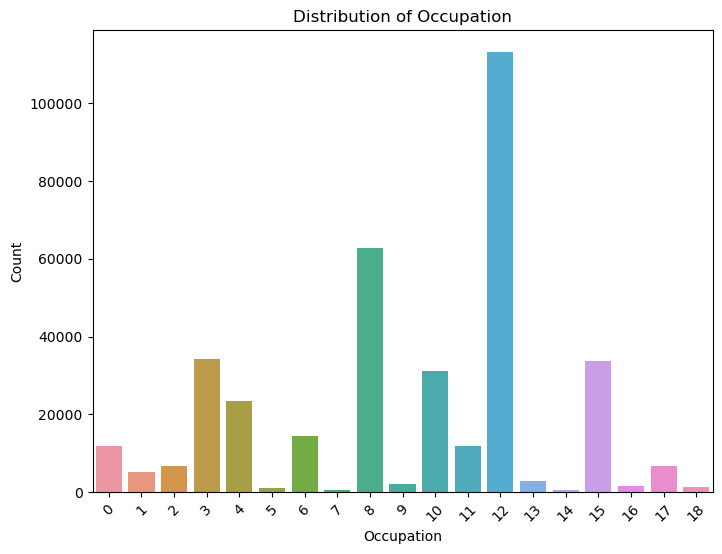

In [37]:
# Visualize the distribution of OCCUPATION_TYPE variable
plt.figure(figsize=(8,6))
sns.countplot(dataset['OCCUPATION_TYPE'])
plt.xticks(rotation=45)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Distribution of Occupation')

In [38]:
def countplot_applicants(features):
    for feature in features:
        plt.figure(figsize=(9, 9))
        ax=sns.countplot(y=dataset[feature], hue='CODE_GENDER' , data=dataset)
        plt.legend(loc='best')
        total = len(dataset[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

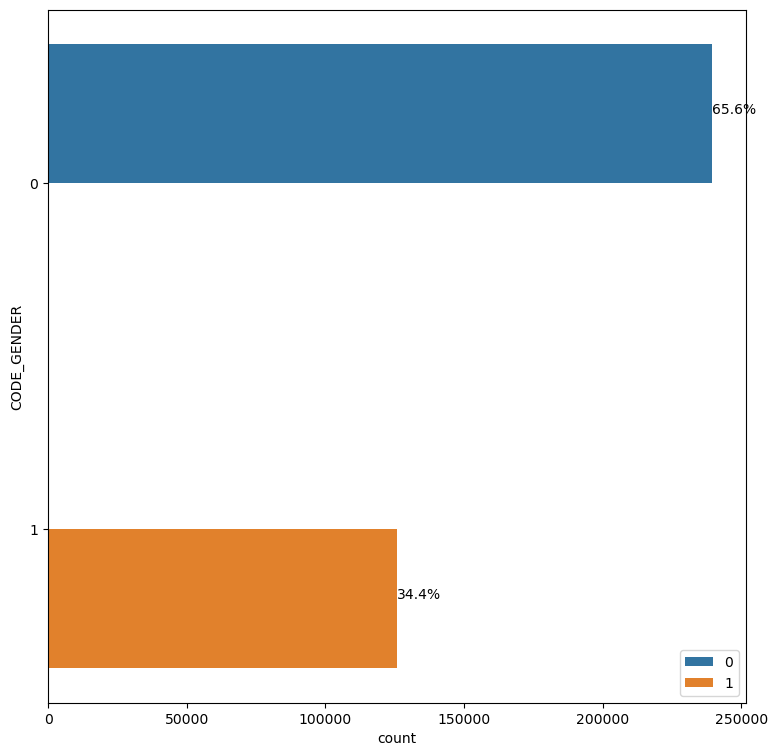

In [39]:
countplot_applicants(['CODE_GENDER'])

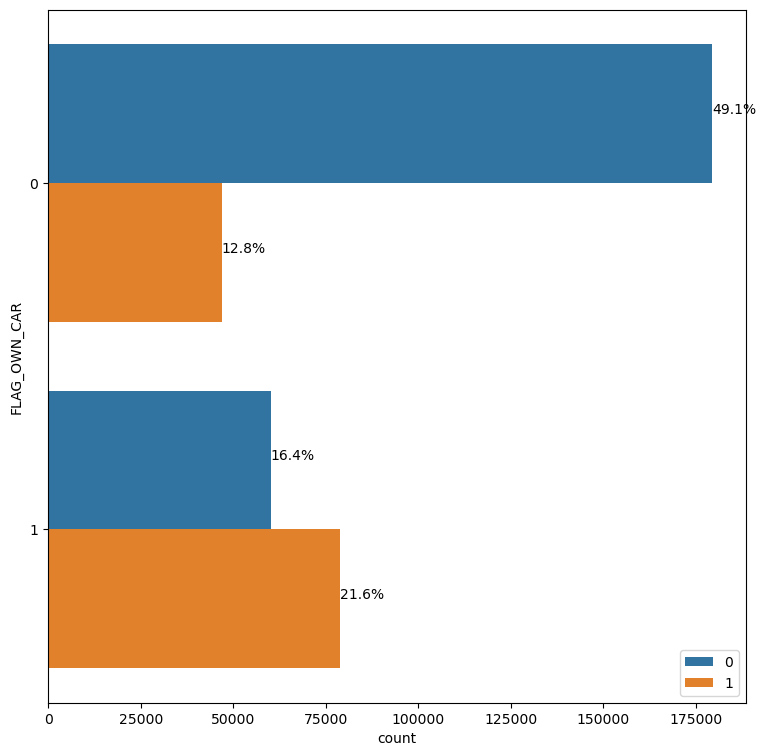

In [40]:
countplot_applicants([ 'FLAG_OWN_CAR',])

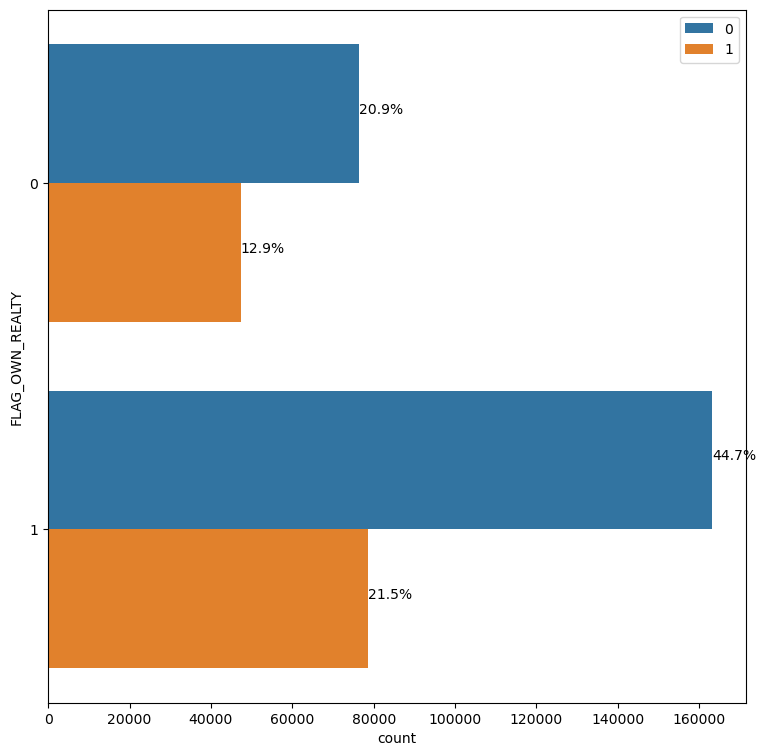

In [41]:
countplot_applicants([ 'FLAG_OWN_REALTY'])

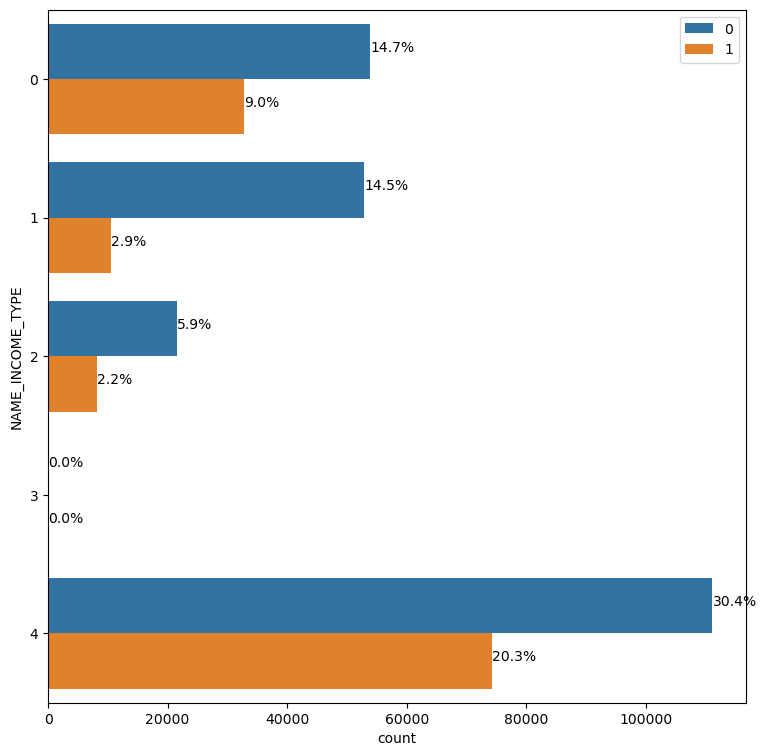

In [42]:
countplot_applicants(['NAME_INCOME_TYPE'])

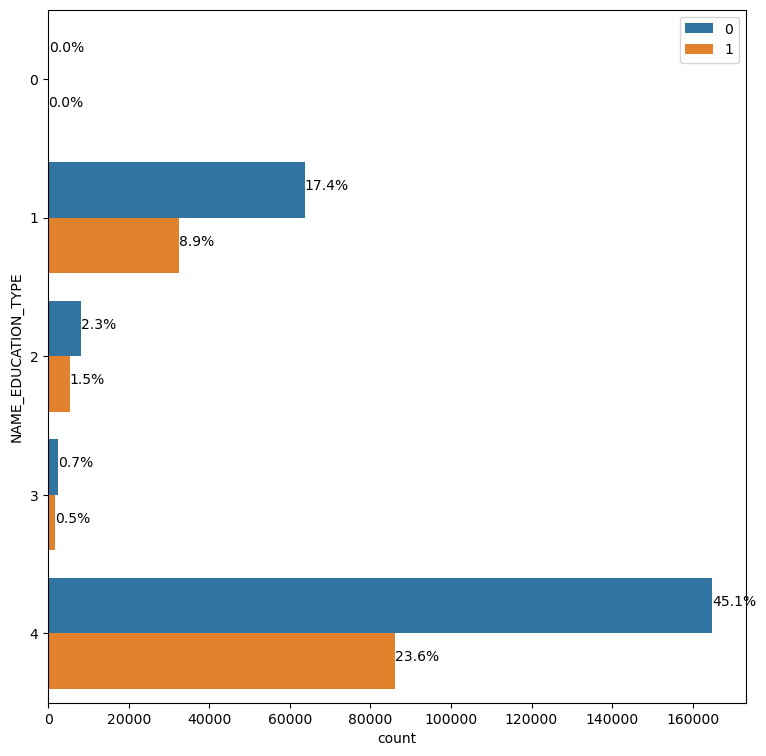

In [43]:
countplot_applicants([ 'NAME_EDUCATION_TYPE'])

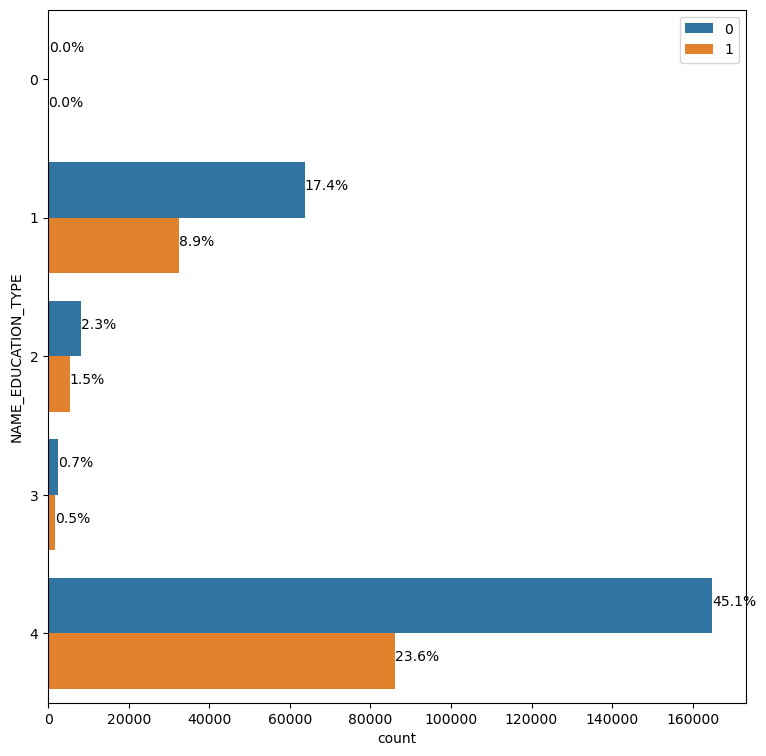

In [44]:
countplot_applicants([ 'NAME_EDUCATION_TYPE'])

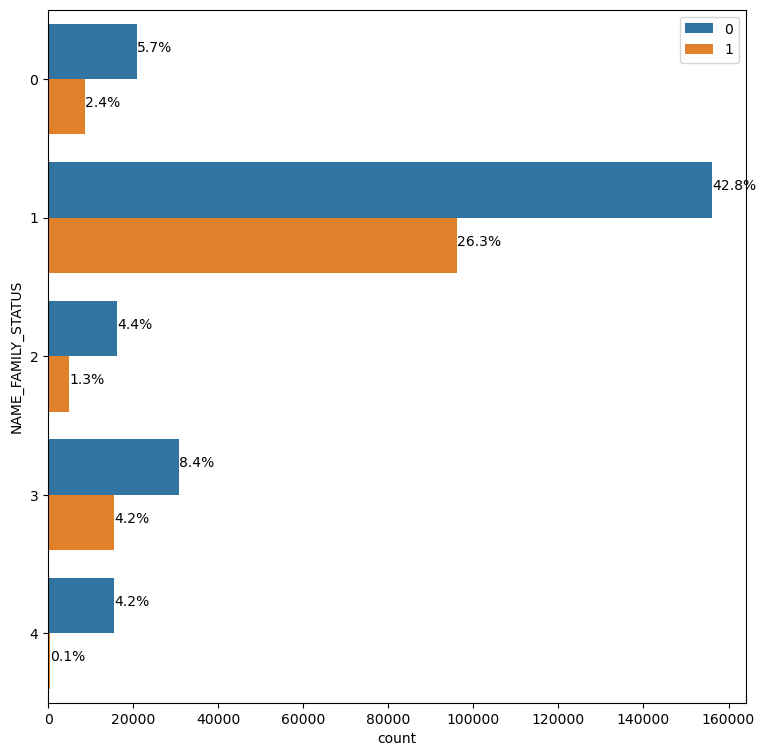

In [45]:
countplot_applicants([ 'NAME_FAMILY_STATUS'])

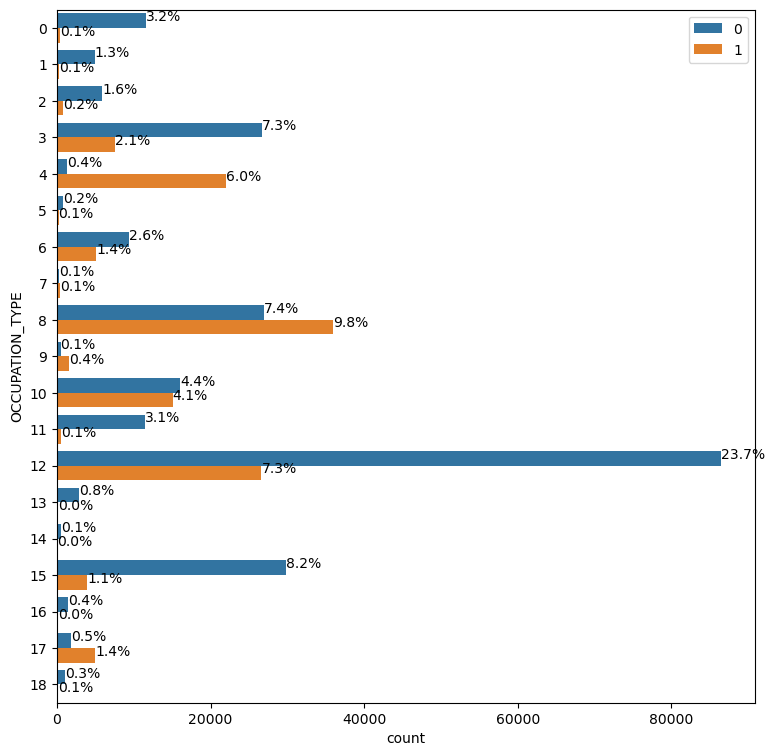

In [46]:
countplot_applicants([ 'OCCUPATION_TYPE'])

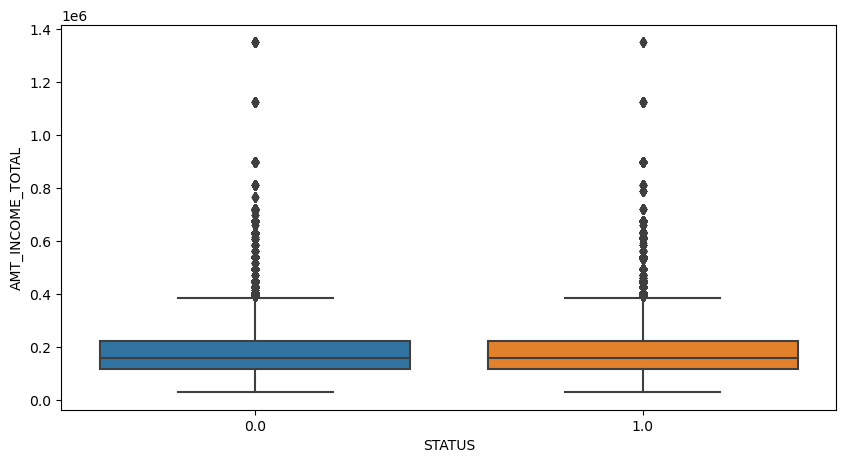

In [47]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'STATUS', y='AMT_INCOME_TOTAL', data = dataset)
plt.show()

In [48]:
dataset = dataset.drop(['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL'], axis=1)


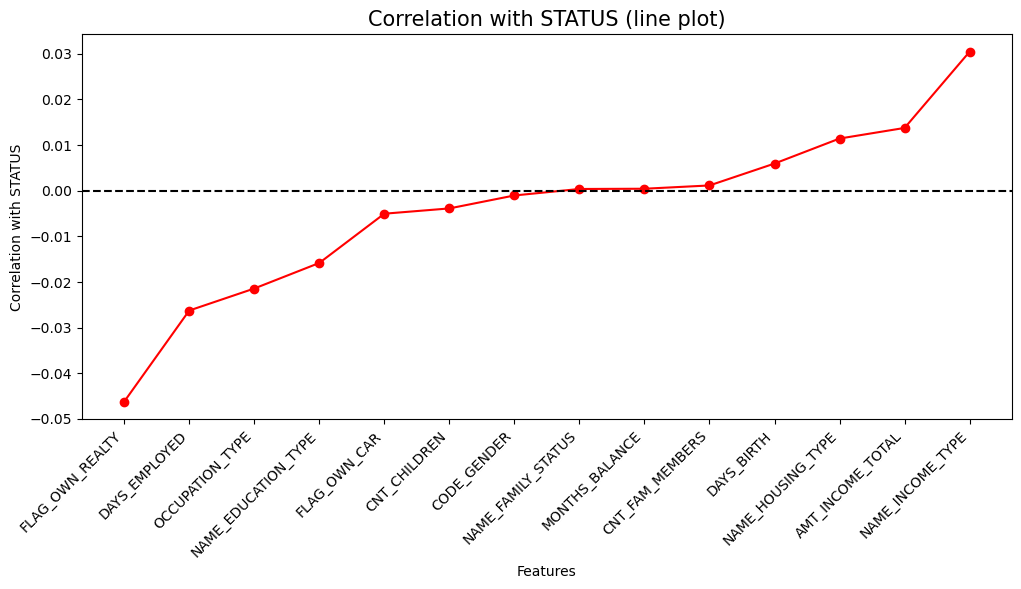

In [49]:
import matplotlib.pyplot as plt

corr_values = dataset.corrwith(dataset['STATUS']).sort_values().drop('STATUS')
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(corr_values.index, corr_values.values, color='red', marker='o')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel('Features')
ax.set_ylabel('Correlation with STATUS')
ax.set_title('Correlation with STATUS (line plot)', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.show()

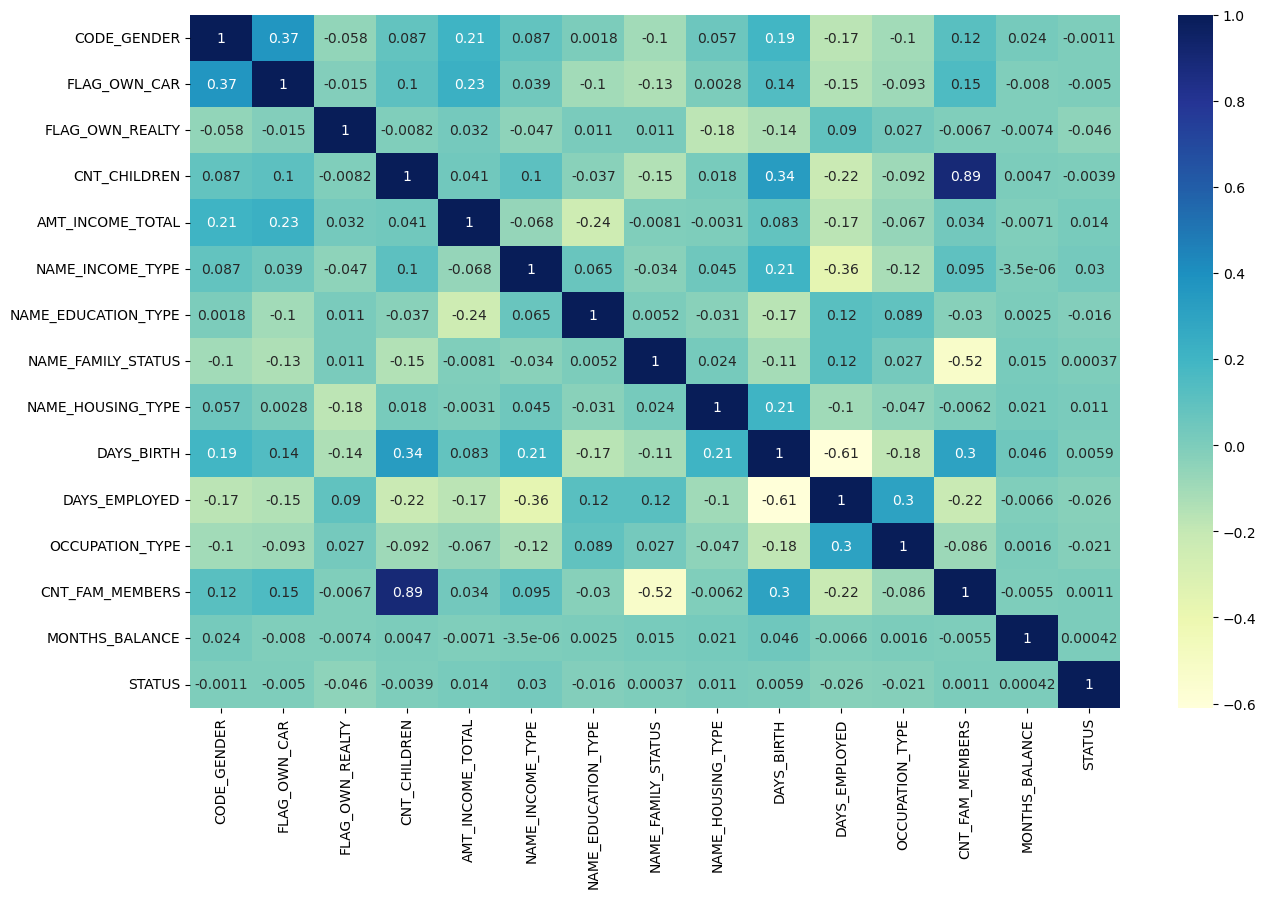

In [50]:
import seaborn as sns
plt.figure(figsize=(15,9))
sns.heatmap(dataset.corr
            (), annot = True, cmap='YlGnBu')
plt.show()

In [51]:
print(dataset.columns)
print(dataset['STATUS'].dtype)


Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'STATUS'],
      dtype='object')
float64


In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365322 entries, 0 to 777714
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          365322 non-null  int32  
 1   FLAG_OWN_CAR         365322 non-null  int32  
 2   FLAG_OWN_REALTY      365322 non-null  int32  
 3   CNT_CHILDREN         365322 non-null  int64  
 4   AMT_INCOME_TOTAL     365322 non-null  float64
 5   NAME_INCOME_TYPE     365322 non-null  int32  
 6   NAME_EDUCATION_TYPE  365322 non-null  int32  
 7   NAME_FAMILY_STATUS   365322 non-null  int32  
 8   NAME_HOUSING_TYPE    365322 non-null  int32  
 9   DAYS_BIRTH           365322 non-null  int64  
 10  DAYS_EMPLOYED        365322 non-null  int64  
 11  OCCUPATION_TYPE      365322 non-null  int32  
 12  CNT_FAM_MEMBERS      365322 non-null  float64
 13  MONTHS_BALANCE       365322 non-null  int64  
 14  STATUS               273965 non-null  float64
dtypes: float64(3), in

In [53]:
dataset["STATUS"] = dataset["STATUS"].fillna(0).astype(int)


In [54]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
train, test = train_test_split(dataset, test_size=0.3, random_state=1)

# Separating the target variable from the independent variables
X_train = train.drop("STATUS", axis=1)
y_train = train["STATUS"]
X_test = test.drop("STATUS", axis=1)
y_test = test["STATUS"]


In [55]:
# Let's also normalize the values.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
import pandas as pd

# Fill the NaN values with the mean value of each column
dataset = dataset.fillna(dataset.mean())


Building Model

In [57]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(class_weight='balanced', max_depth=48, splitter='best', random_state=42, min_samples_split=48)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=48,
                       min_samples_split=48, random_state=42)

In [58]:
y_pred = classifier.predict(X_test)

In [59]:
y_pred_train= classifier.predict(X_train)

In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94     67690
           1       0.89      0.93      0.91     41907

    accuracy                           0.93    109597
   macro avg       0.92      0.93      0.93    109597
weighted avg       0.93      0.93      0.93    109597



Calculating Scores

test accuracy (results)

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y_test,y_pred)
confusion_mat = confusion_matrix(y_test,y_pred)
pre_score = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
specificity_test = confusion_mat[0,0] / (confusion_mat[0,0] + confusion_mat[0,1])

In [62]:
print(f'Accuracy Score = {acc}\n Confusion Matrix = {confusion_mat}\n Precision Score = {pre_score}\n Recall Score = {recall}\n F1 Score = {f1}\n Specificity Test = {specificity_test}')

Accuracy Score = 0.9286476819620975
 Confusion Matrix = [[62617  5073]
 [ 2747 39160]]
 Precision Score = 0.8853118712273642
 Recall Score = 0.9344500918700933
 F1 Score = 0.9092175528209891
 Specificity Test = 0.925055399615896


Train Results

In [63]:
acc_train = accuracy_score(y_train,y_pred_train)
confusion_mat_train = confusion_matrix(y_train,y_pred_train)
pre_score_train = precision_score(y_train,y_pred_train)
recall_train = recall_score(y_train,y_pred_train)
f1_train = f1_score(y_train,y_pred_train)
specificity_train = confusion_mat_train[0,0] / (confusion_mat_train[0,0] + confusion_mat_train[0,1])

In [64]:
print(f'Accuracy Score = {acc_train}\n Confusion Matrix = {confusion_mat_train}\n Precision Score = {pre_score_train}\n Recall Score = {recall_train}\n F1 Score = {f1_train}\n Specificity Test = {specificity_train}')

Accuracy Score = 0.9405181347150259
 Confusion Matrix = [[147492  10314]
 [  4897  93022]]
 Precision Score = 0.90018967252458
 Recall Score = 0.949989276851275
 F1 Score = 0.9244192690864824
 Specificity Test = 0.9346412683928368


In [65]:
X_train.shape, y_train.shape

((255725, 14), (255725,))

In [66]:
from sklearn.ensemble import RandomForestClassifier

#Fitting Decision Tree classifier to the training set  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [67]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  

In [68]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)
cm

array([[65873,  1817],
       [ 2259, 39648]], dtype=int64)

In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     67690
           1       0.96      0.95      0.95     41907

    accuracy                           0.96    109597
   macro avg       0.96      0.96      0.96    109597
weighted avg       0.96      0.96      0.96    109597



In [70]:
from sklearn.linear_model import LogisticRegression

### Creating a Logistic regression object
logistic_reg=LogisticRegression(random_state = 0)

In [71]:
### Passing independant and dependant training data to the model
logistic_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [72]:
logistic_reg_pred=logistic_reg.predict(X_test)
logistic_reg_pred

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
confusion_mat=confusion_matrix(y_test, logistic_reg_pred)
confusion_mat

array([[67686,     4],
       [41905,     2]], dtype=int64)

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logistic_reg_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76     67690
           1       0.33      0.00      0.00     41907

    accuracy                           0.62    109597
   macro avg       0.48      0.50      0.38    109597
weighted avg       0.51      0.62      0.47    109597



In [75]:
from sklearn.neighbors import KNeighborsClassifier

classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train) 

KNeighborsClassifier()

In [76]:
#Predicting the test set result  
y_pred= classifier.predict(X_test) 

In [77]:
y_pred


array([0, 1, 0, ..., 0, 0, 0])

In [78]:
cm= confusion_matrix(y_test, y_pred) 
print(cm)

[[63916  3774]
 [ 4424 37483]]


In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     67690
           1       0.91      0.89      0.90     41907

    accuracy                           0.93    109597
   macro avg       0.92      0.92      0.92    109597
weighted avg       0.93      0.93      0.93    109597



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.3min finished


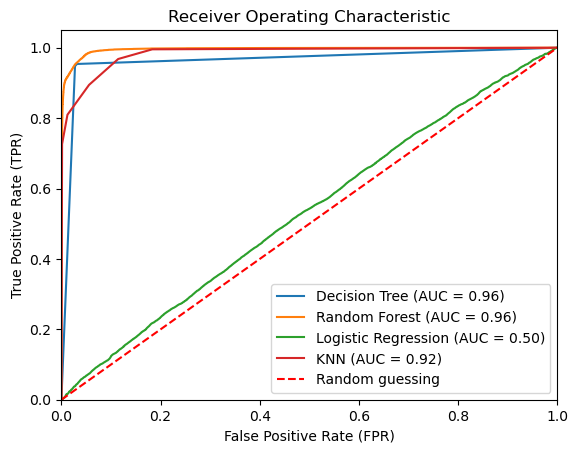

In [80]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from joblib import Parallel, delayed

# Define classifiers
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()
lr_classifier = LogisticRegression()
knn_classifier = KNeighborsClassifier(n_neighbors=5)

classifiers = [(dt_classifier, 'Decision Tree'),
               (rf_classifier, 'Random Forest'),
               (lr_classifier, 'Logistic Regression'),
               (knn_classifier, 'KNN')]

# Fit classifiers and calculate ROC AUC score and curve in parallel
def fit_classifier(classifier, name):
    classifier.fit(X_train, y_train)
    roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
    fpr, tpr, _ = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
    return (fpr, tpr, name, roc_auc)

results = Parallel(n_jobs=-1, verbose=1)(
    delayed(fit_classifier)(classifier, name) for classifier, name in classifiers)

# Plot ROC curves
for fpr, tpr, name, roc_auc in results:
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (name, roc_auc))

# Plot random guessing
plt.plot([0, 1], [0, 1],'r--', label='Random guessing')

# Plot formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Save the plot to a file
plt.savefig('roc.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()




[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.1min finished


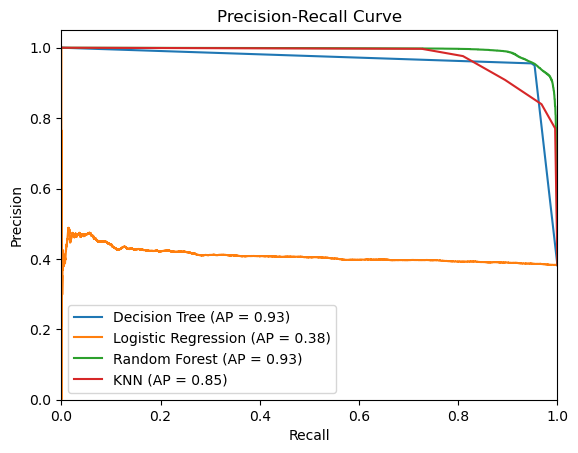

In [81]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from joblib import Parallel, delayed

# Create decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Define function to calculate precision-recall metrics for a single classifier
def calc_pr(clf, name):
    pr_auc = average_precision_score(y_test, clf.predict(X_test))
    precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test)[:,1])
    return (precision, recall, name, pr_auc)

# Calculate precision-recall metrics for all classifiers in parallel
classifiers = [(dt, 'Decision Tree'), (lr, 'Logistic Regression'), (rf, 'Random Forest'), (knn, 'KNN')]
results = Parallel(n_jobs=-1, verbose=1)(delayed(calc_pr)(clf, name) for clf, name in classifiers)

# Plot precision-recall curves for all classifiers
for precision, recall, name, pr_auc in results:
    plt.plot(recall, precision, label=name + ' (AP = %0.2f)' % pr_auc)

# Plot formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.savefig('PR.png', dpi=300)
plt.show()


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   34.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   34.3s finished


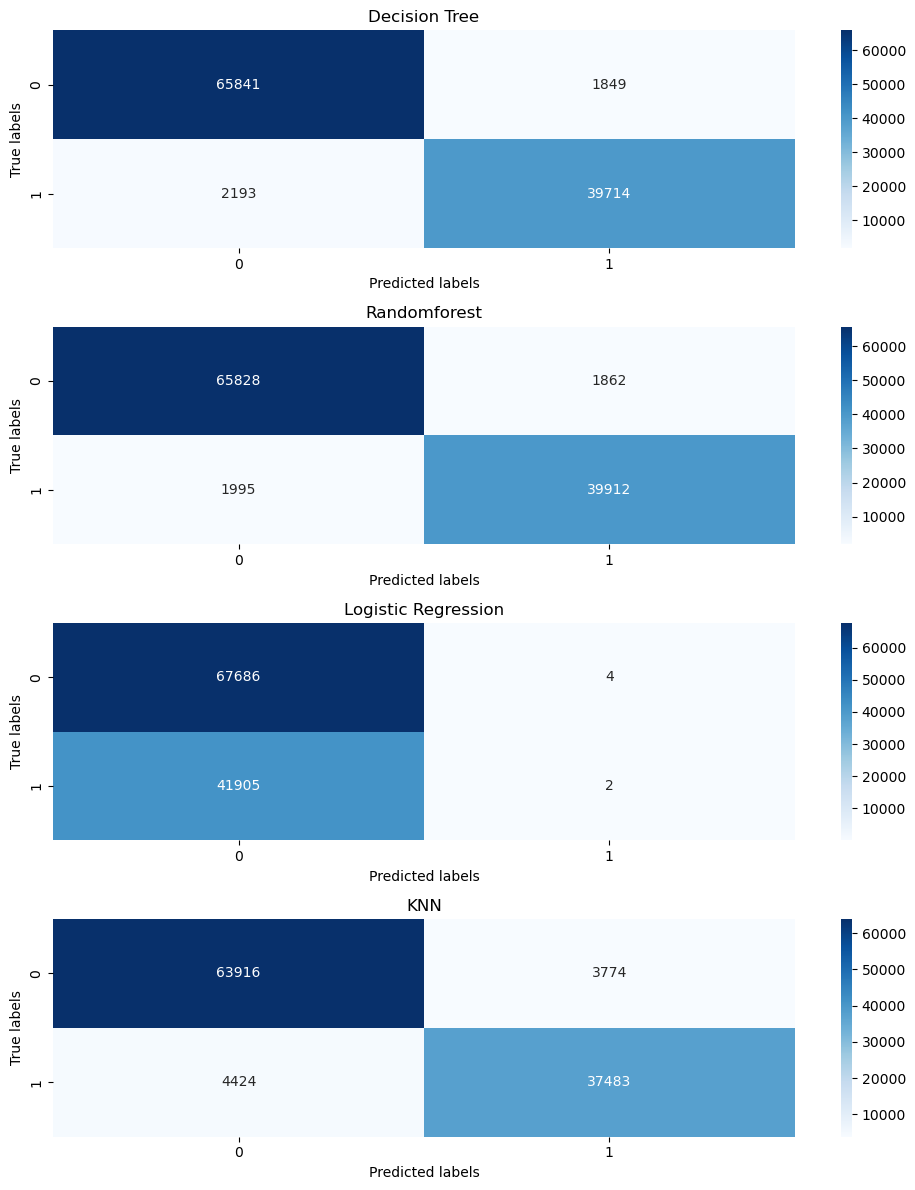

In [82]:
# Define the KNN model
knn = KNeighborsClassifier()

# Fit the KNN model to the training data
knn.fit(X_train, y_train)

# Generate confusion matrices for all models in parallel
def generate_conf_matrix(model, model_name):
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return (conf_matrix, model_name)

conf_matrices = Parallel(n_jobs=-1, verbose=1)(
    delayed(generate_conf_matrix)(model, model_name) for model, model_name in [(dt, 'Decision Tree'), (rf, 'Randomforest'), (lr, 'Logistic Regression'), (knn, 'KNN')])

# Plot all confusion matrices in a single figure
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 12))
for ax, (conf_matrix, model_name) in zip(axes.flat, conf_matrices):
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(model_name)

plt.tight_layout()
plt.show()
